## Confidence intervals

A $1-\alpha$ confidence interval defined for a parameter $\theta$ is a pair of statistics $L(X_{1},X_{2}, \cdots, X_{N})$ and $U(X_{1}, X_{2}, \cdots, X_{N})$ such that $P[ \theta \in (L,U) ] = 1 - \alpha$. 

One way to think about a confindence interval for a parameter is to imagine a random variable $C \sim \text{Bernoulli}(1-\theta)$ that takes the value one when the confidence interval contains the true parameter value and zero when the true parameter value lies outside the interval. 

Lets visualize this process and then lets explore building confidence intervals for a dataset using R. 

### Model
Lets assume we are studying some process that can be modeled as a sequence of indendent and identically distributed random variables with a Bernoulli distribution $X_{1}, X_{2}, \cdots, X_{n} \sim \text{Bernoulli}(0.34)$. 


### An estimate for $\theta$
Our work with the method of moments showed that an estimate (or best guess) for $\theta$ was 

\begin{align}
    \hat{\theta} = \frac{\sum_{i} X_{i}}{N} = \overline{X}
\end{align}

The expected value for $\hat{\theta}$ is

\begin{align}
    \mathbb{E}( \hat{\theta} ) &= \frac{\sum_{i} \mathbb{E}(X_{i})}{N} \\ 
                               &= \frac{\sum_{i} \theta }{N}\\
                               &= \frac{N \theta }{N}\\
    \mathbb{E}( \hat{\theta} ) &= \mu = \theta
\end{align}

and variance for  $\hat{\theta}$ is 
\begin{align}
    V(\hat{\theta}) &= \frac{\sum_{i} V(X_{i})}{N^2} \\ 
         &= \frac{\sum_{i} \theta(1-\theta)}{N^2} \\
         &= \frac{ N \theta(1-\theta)}{N^2} \\
    V(\hat{\theta}) &= \sigma^{2} = \frac{ \theta(1-\theta)}{N} \\
\end{align}

### THE CLT
We learned in class that the Central Limit Thm. states for this estimate

\begin{align}
    \hat{\theta} \sim \mathcal{N}\left( \theta ,  \frac{\theta (1-\theta)}{N} \right)
\end{align}

However, we do not know the true $\theta$ and instead of a single sample drawn from each $X_{1},X_{2},\cdots,X_{N}$. Lets label our sample (or data set) $\mathcal{D} = (x_{1},x_{2},\cdots,x_{N})$ where $x_{i}$ are the **real** samples of data. 

Then we can use our estimate $\hat{\theta} = \overline{x}$ to make a best guess at the distribtuion above
\begin{align}
    \hat{\theta} \sim \mathcal{N}\left( \overline{x} ,  \frac{\overline{x} (1-\overline{x})}{N} \right)
\end{align}


### A confidence interval based on the CLT
and we can propose the following 1-$\alpha$ confidence interval:

\begin{align}
   I =  [\overline{x} - z_{1-\alpha/2} \sigma , \overline{x} + z_{1-\alpha/2} \sigma]
\end{align}
where $z_{1-\alpha/2}$ is the value $z$ such that $F_{Z}(-z) = 1-\alpha/2$.

Remember that we **propose** that this interval will include the true parameter with probability $1-\alpha$.
Once we generate a dataset, the interval above either includes or does not include the true parameter. 

### Checking is this confidence interval is ok.

Lets look at this process for several samples. 
We will (i) generate 100 datasets from $X_{1},X_{2},\cdots,X_{n}$, (ii) compute 100 confidence intervals for each of the 100 datasets, and (iii) plots the interval computed from the first sample at the top of our graph, the second confidence interval associated with the second sample underneath the first confidence interval, and so on. 

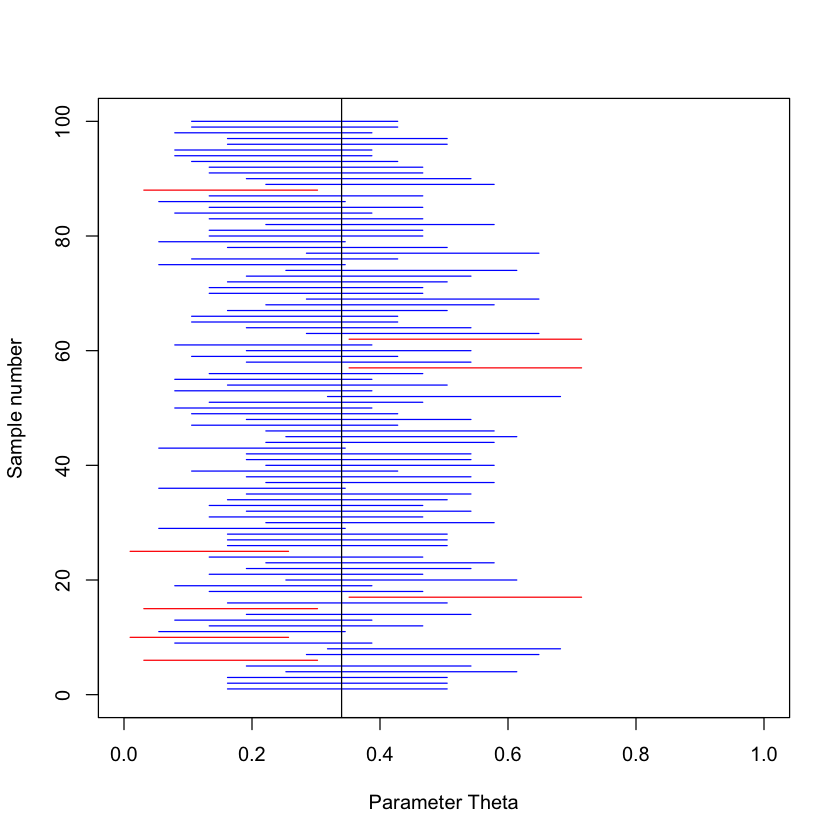

In [47]:
theta = 0.34
alpha=0.05
n = 30

covered=0
for (sample in 1:100){
    samples = rbinom(n, 1, theta)
    sample_mean = mean(samples)
    
    sigma2 = var(samples)/n 
    sigma  = sqrt(sigma2)
    
    L = sample_mean - qnorm(1-alpha/2)*sigma
    U = sample_mean + qnorm(1-alpha/2)*sigma
    
    color="red"
    if (L<theta & theta <U){
        color="blue"
        covered=covered+1
    }
    
    if (sample==1){
        plot( c(L,U), c(sample,sample) , type="l", ylim=c(0,100), col=color, xlim=c(0,1), ylab="Sample number", xlab="Parameter Theta")
    } else{
        lines( c(L,U), c(sample,sample), col=color )
    }
}
abline(v=theta)

### The empricial coverage of this confidnece interval

We can go one step further with the above empirical investigation of the confidence interval that we built by measuring the **coverage**.
Suppose we generate $N$ samples and build a corresponding $N$ confidence intervals $(L,U)$ for a parameter $\theta$. Then the **coverage** for is defined as the proportion of confidence intervals where $L < \theta < U$. 

The coverage for the single set of 100 confidenve intervals above is 

In [49]:
covered/100

[1] 0.92

However, we can obtain an empricial distribution of coverage by running the above procedure many times. 

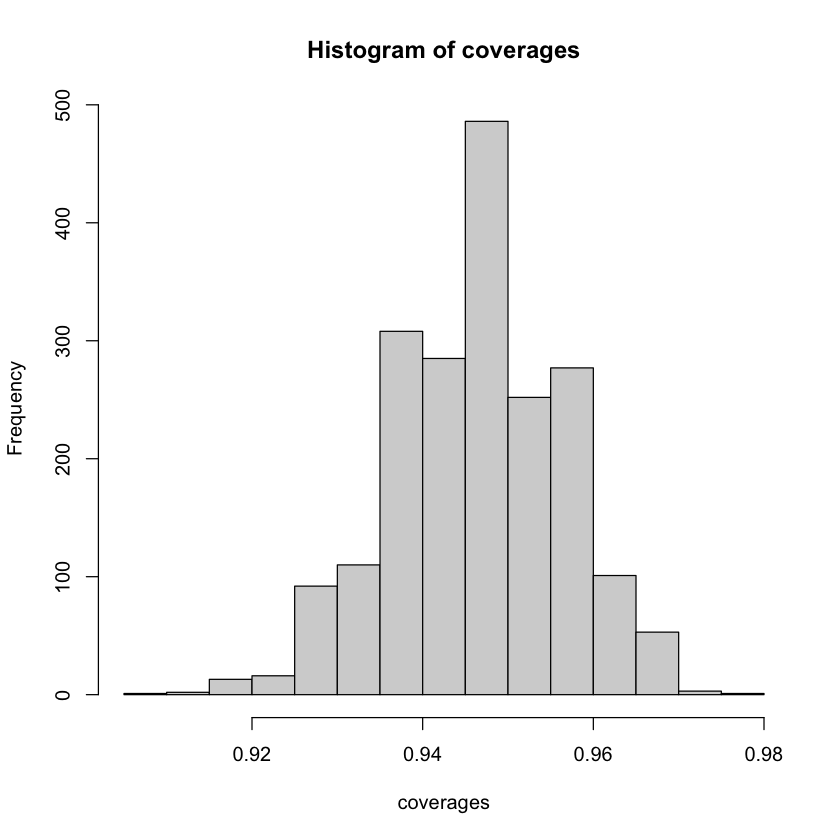

In [54]:
theta = 0.34
alpha=0.05
n = 30

fromSample2Coverage = function(){
    covered=0
    for (sample in 1:500){
        samples = rbinom(n, 1, theta)
        sample_mean = mean(samples)

        sigma2 = var(samples)/n 
        sigma  = sqrt(sigma2)

        L = sample_mean - qnorm(1-alpha/2)*sigma
        U = sample_mean + qnorm(1-alpha/2)*sigma

        if (L<theta & theta <U){
            covered=covered+1
        }
    }
    return(covered/500)
}

coverages = rep(0,2000)
for (m in 1:2000){
    coverages[m] = fromSample2Coverage()
}
hist(coverages,20)

Not bad! The majority of coverages are close to 0.95.  

### Estimating confidence intervals in R. 

R has many useful packages for estimating parameters of random variables and computing confidence intervals. 
Lets look at how we can use the statistics we have learned to quantify tree cover, temperature, humidity, and the prevelance of dengue fever.  

The dataset documentation is here = https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/dengue.html

This dataset was used to describe changes in the incidence of dengue fever over time due to global warming (Hales, S., de Wet, N., Maindonald, J. and Woodward, A. 2002. Potential effect of population and climate change global distribution of dengue fever: an empirical model. The Lancet 2002; 360: 830-34.). 

Our goal is to characterize some of the variables in this dataset and describe our estimates and confidence intervals to others.

In [71]:
d = read.csv("dengue.csv")
d = d[complete.cases(d),]
head(d)

,X,humid,humid90,temp,temp90,h10pix,h10pix90,trees,trees90,NoYes,Xmin,Xmax,Ymin,Ymax
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.6713889,4.416667,2.037500,8.470835,17.35653,17.80861,0,1.5,0,70.5,74.5,38.0,35.5
2,2,7.6483340,8.167500,12.325000,14.925000,10.98361,11.69167,0,1.0,0,62.5,64.5,35.5,34.5
3,3,6.9790556,9.563058,6.925000,14.591660,17.50833,17.62528,0,1.2,0,68.5,69.5,36.0,35.0
4,4,1.1104163,1.825361,4.641665,6.046669,17.41763,17.51694,0,0.6,0,67.0,68.0,35.0,34.0
5,5,9.0270555,9.742751,18.175000,19.710000,13.84306,13.84306,0,0.0,0,61.0,64.5,33.5,32.0
6,6,8.9141113,9.516778,11.900000,16.643341,11.69167,11.69167,0,0.2,0,64.5,65.5,36.5,35.0


#### A description of the temperature in the these regions. 

Lets first explore the empirical distribution of temperature for all regions by plotting a histogram.

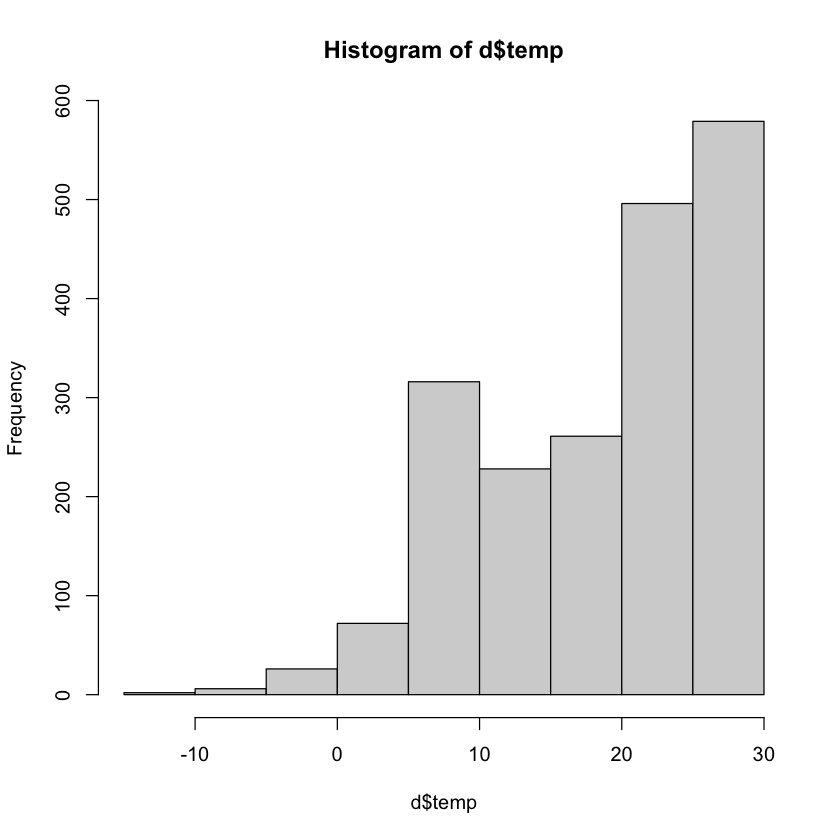

In [72]:
hist(d$temp)

An ok, but no great, assumption is that the temperatures were generated from a sequence of normal distribution that are independent from one another with the same parameter values, or for a sequence of random variables $T_{1}, T_{2}, \cdots, T_{N} \sim \mathcal{N}\left(\mu, \sigma^{2}\right)$. 

To help explain the temperature in these regions to another audience we can describe the expected value for the temperature $E(T_{i}) =  \mu$. 

An estimator of $\mu$ is
\begin{equation}
    \hat{\mu} = \dfrac{\sum_{i=1}^{N} X_{i} }{N}
\end{equation}

and the CLT tells us that if we find the expected value of $\hat{\mu}$ and the variance of $\hat{\mu}$ then this follows a special normal distribution. 

From class we found 

\begin{align}
    \mathbb{E}(\hat{\mu}) &= \mu\\
             V(\hat{\mu}) &=  \sigma^{2} / N
\end{align}

and so we know from the CLT that $\hat{\mu} \sim \mathcal{N}(\mu, \sigma^{2}/N)$.
We can replace $\hat{\mu}$ with our best guess $\overline{t}$ and $\sigma^{2}$ with our best guess $s^{2} = \sum_{i=1}^{N}(t_{i}-\overline{t})^{2}/N$.

\begin{align}
    \hat{\mu} \sim \mathcal{N}(\overline{t}, s^{2}/N)
\end{align}

In class we also found a formula for the confidence interval:

\begin{align}
    CI_{\mu} = [ \overline{t} - z_{1-\alpha/2} \sigma,  \overline{t} + z_{1-\alpha/2} \sigma ]
\end{align}



In [73]:
N     = nrow(d) 
tbar  = mean(d$temp)

var_t   = var(d$temp) / N
std_t   = sqrt(var_t) 

alpha=0.05
z = qnorm( 1 - alpha/2 )

CI = c( tbar - z*std_t, tbar + z*std_t )

In [76]:
tbar

[1] 18.43857

In [75]:
CI

[1] 18.08603 18.79112

The average temperature from 1961 to 1990 over all administrative regions was 18.44C (64F) with a 95% confidence interval of $[18.08C, 18.79C]$. 

The above statement is compact. What this statement means is that we assumed every observation was generated from a set of independent and identically distributed random variables, and that the distribution of the mean of these random variables folllows a normal distribution with an estimated point estimate for $\mu$ of 18.44C, and we are 95% confident that additional samples of temperature of the same size would lead us to conclude the true $\mu$ is between 18.08C and 18.79C. 

This is a bit longer!

## Assignment

1. Write a function that takes a vector argument called `v` and a float argument called `alpha` and outputs a vector where the first item in the vector is the mean of `v`, the second item in the vector is the lower (1-alpha) of `v`, and the third item is the upper (1-alpha)CI of `v`. 
2. Characterize and communicate the humidity in these regions. Make sure to discuss the mean and 95CI. 
3. Characterize and communicate the proportion of dengue fever across these regions. Make sure to discuss the mean and 95CI. 
4. Write a for loop that applied the above function you created to ever column of our dengue dataset, printing the mean, 95CI for each column. 
5. Would the mean and 95CI change if we assumed a random variable with a different distribution than normal generated our data? Why or Why not?  